In [1]:
from IPython.display import Image

## Today's Agenda
- Minimum Spanning Trees
- Prim's Algorithm
- Kruskal's Algorithm

### Greedy Algorithms

- An algorithm is designed to achieve optimum solution for a given problem. 
- In greedy algorithm approach, decisions are made from the given solution domain. 
- A greedy algorithm for an optimization problem always makes the choice that looks best at the moment and adds it to the current subsolution.
- That is, it makes a locally optimal choice in the hope that this choice will lead to a globally optimal solution.
- Greedy algorithms try to find a localized optimum solution, which may eventually lead to globally optimized solutions.
- Greedy algorithms do not always yield optimal solutions, but for many problems they do.

## Spanning Trees

#### Refresh some definitions
- A **tree** is an undirected, acyclic, connected graph.

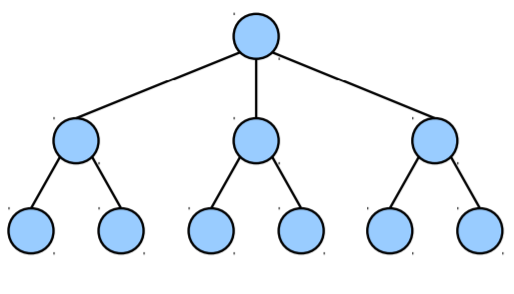

In [2]:
Image(filename='images/week-12/undirected_tree1.png', width=200)

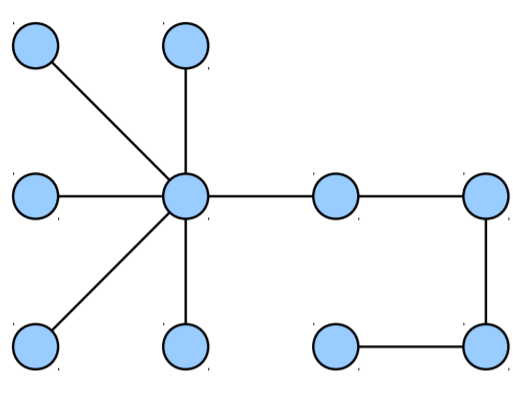

In [3]:
Image(filename='images/week-12/undirected_tree2.png', width=200)

An undirected graph is called **minimally connected** iff it is connected and removing any edge disconnects it.

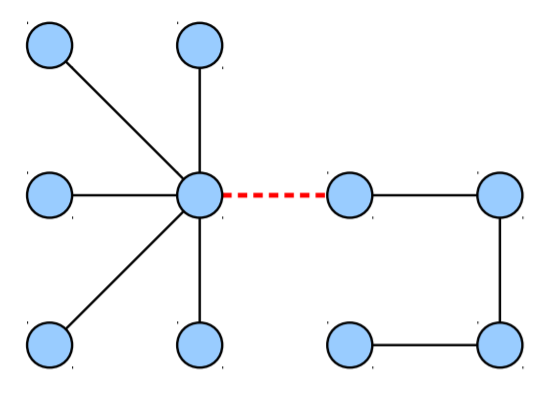

In [4]:
Image(filename='images/week-12/undirected_tree_minmally_connected1.png', width=200)

**Theorem:** If an undirected graph is a tree then it is minimally connected. Reverse is also true.

An undirected graph is called **maximally acyclic** iff adding any missing edge introduces a cycle.

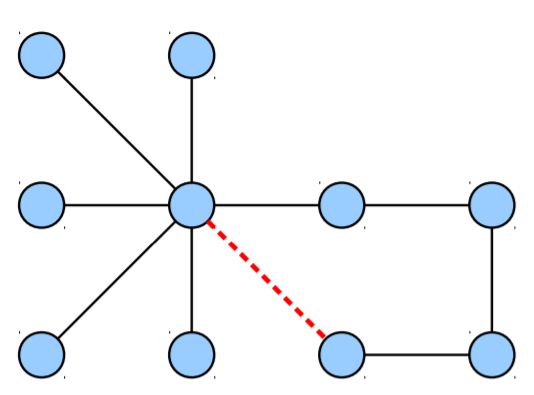

In [5]:
Image(filename='images/week-12/undirected_tree_maximally_acyclic1.png', width=200)

**Theorem:** An undirected graph is a tree iff it is maximally acyclic.

**Theorem:** If an undirected graph is a tree then it is connected and $\vert E\vert = \vert V\vert-1$.

- A tree is an undirected graph $G = (V, E)$ that is connected and acyclic.
- All the following are equivalent:
    - $G$ is a tree.
    - $G$ is connected and acyclic.
    - $G$ is minimally connected (removing any edge from $G$ disconnects it.)
    - $G$ is maximally acyclic (adding any edge creates a cycle)
    - $G$ is connected and $\vert E\vert = \vert V\vert-1$

## Spanning Trees

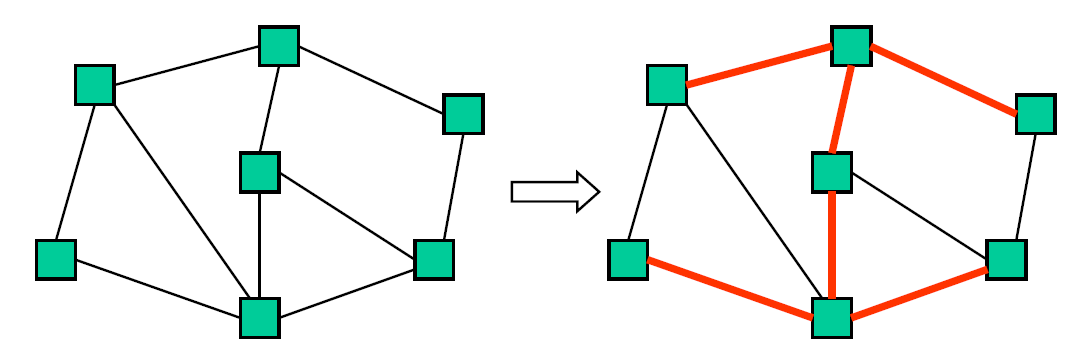

In [6]:
Image(filename='images/week-12/spanningTree.png', width=500)

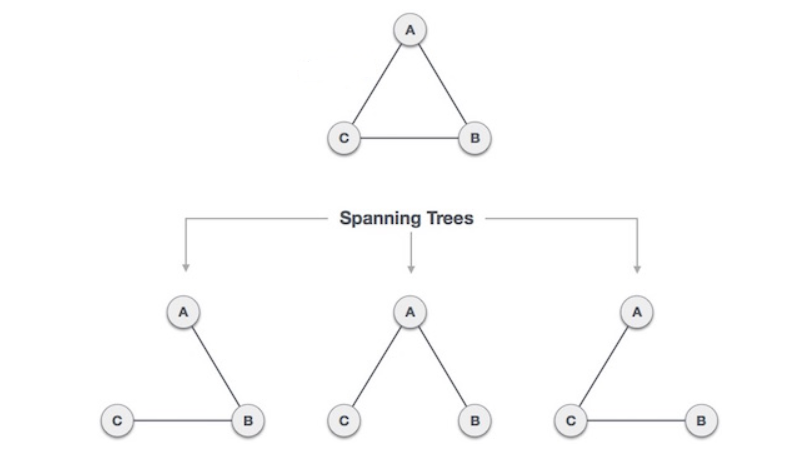

In [7]:
Image(filename='images/week-12/spanningTrees.png', width=500)

In [2]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='images/week-13/spanningTreeEx1.png', width=200></td><td><img src='images/week-13/spanningTreeEx2.png', width=200></td></tr><tr><td><img src='images/week-13/spanningTreeEx3.png', width=200></td><td><img src='images/week-13/spanningTreeEx4.png', width=200></td></tr></table>"))

,
,


- **A simple problem:** Given a connected undirected graph $G=(V,E)$, find a minimal subset of edges such that $G$ is still connected.
    - A graph $G2=(V,T)$ such that $T$ is connected and removing any edge from $T$ makes $G2$ disconnected.

**Definition** Let $G = (V, E)$. A **spanning tree** of $G$ is a graph $G2=(V, T)$ such that $T\subset E$ and $(V, T)$ is a tree.

### Some quick observations
1. Any solution to this problem is a tree
    - Recall a tree does not need a root; just means acyclic
    - For any cycle, could remove an edge and still be connected
2. Solution not unique unless original graph was already a tree
3. Problem ill-defined if original graph not connected
    - So $\vert E\vert \ge \vert V\vert-1$
4. A tree with $\vert E\vert$ nodes has $\vert V\vert-1$ edges
    - So every solution to the spanning tree problem has $\vert V\vert-1$ edges.

**Definition** Suppose that each edge $(u, v) \in E$ is assigned a cost $c(u, v)$. The cost of a tree $T$, denoted $c(T)$, is the sum of the costs of the edges in $T$
\begin{equation}
c(t)=\sum_{(u,v)\in T}c(u, v).
\end{equation}

**Definition** A minimum spanning tree (or MST) of $G$ is a spanning tree $T^{\star}$ of $G$ with minimum cost.

### Obtaining Spanning Tree
A **spanning tree** connects all the nodes with as few edges as possible

#### Two Approaches
- Different algorithmic approaches to the (unweighted) spanning-tree problem: **vertex-by-vertex** approach and **edge-by-edge** approach.
1. Do a graph traversal (e.g., depth-first traversal, but any traversal will do), keeping track of edges that form a tree
2. Iterate through edges; add to output any edge that does not create a cycle.

### First Approach - Spanning tree via DFS

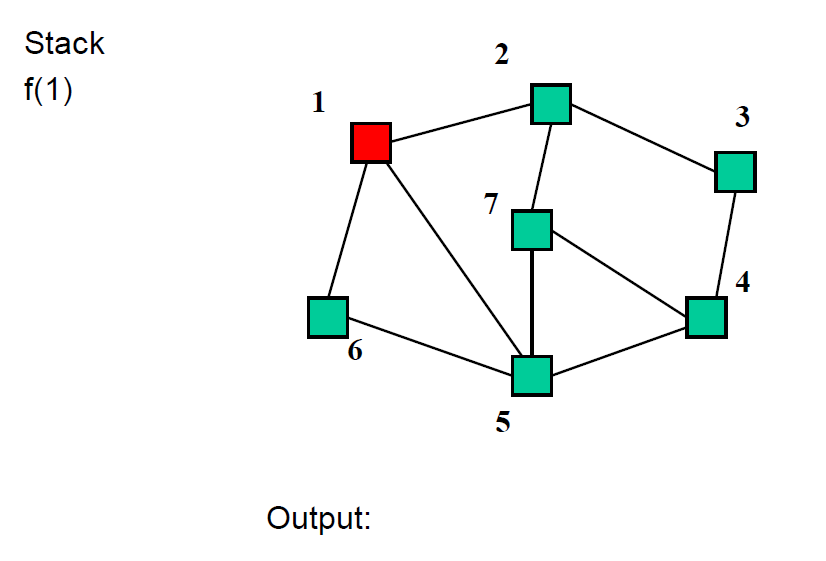

In [9]:
Image(filename='images/week-12/spanningTree1.png', width=500)

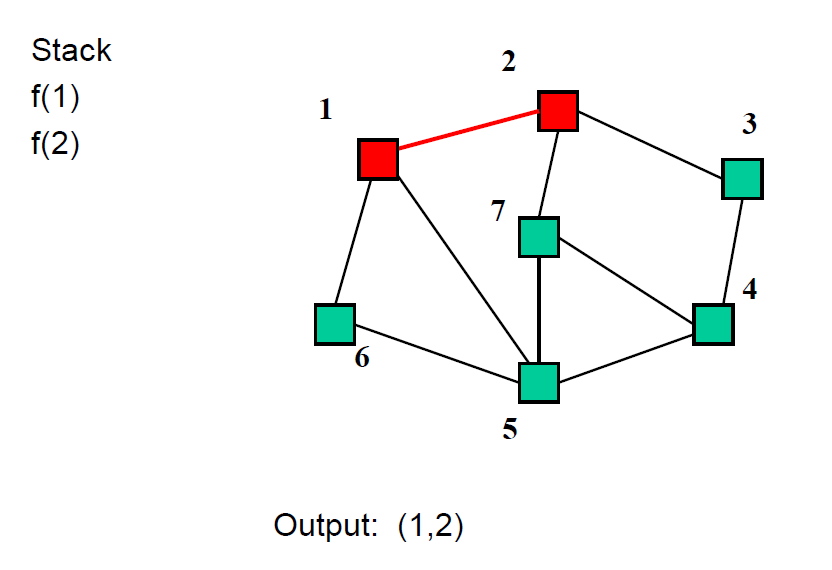

In [10]:
Image(filename='images/week-12/spanningTree2.png', width=500)

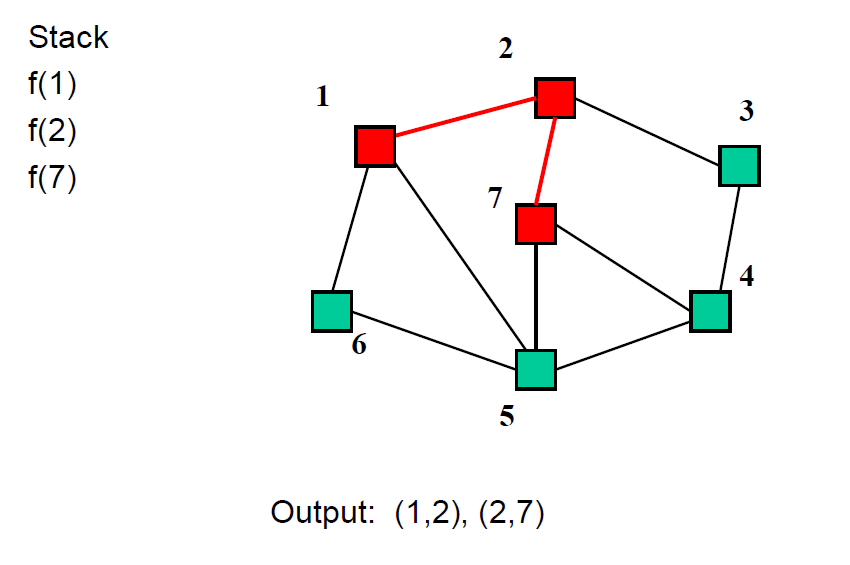

In [11]:
Image(filename='images/week-12/spanningTree3.png', width=500)

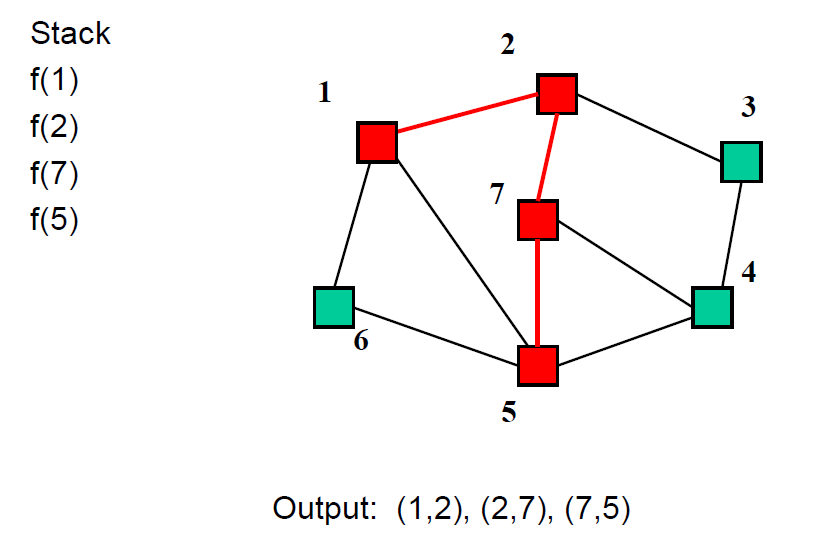

In [12]:
Image(filename='images/week-12/spanningTree4.png', width=500)

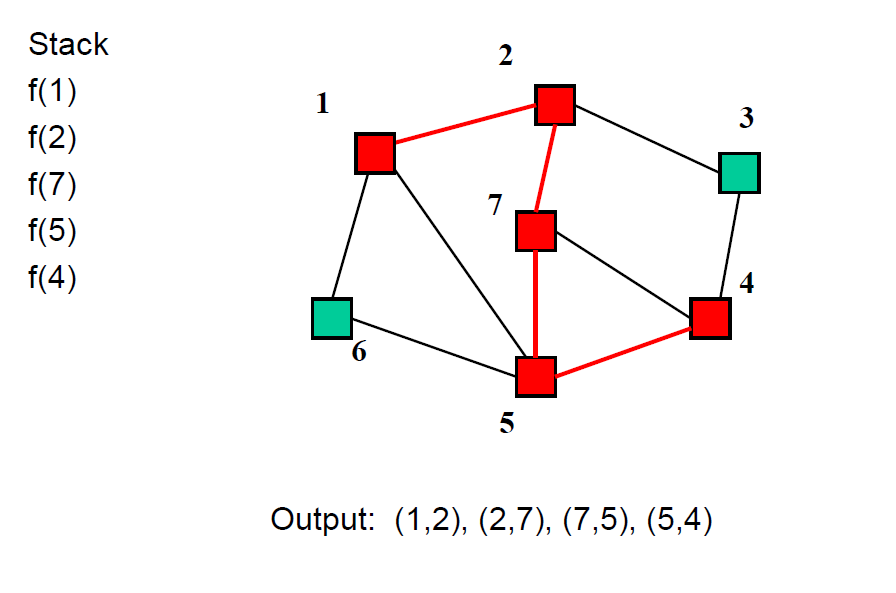

In [13]:
Image(filename='images/week-12/spanningTree5.png', width=500)

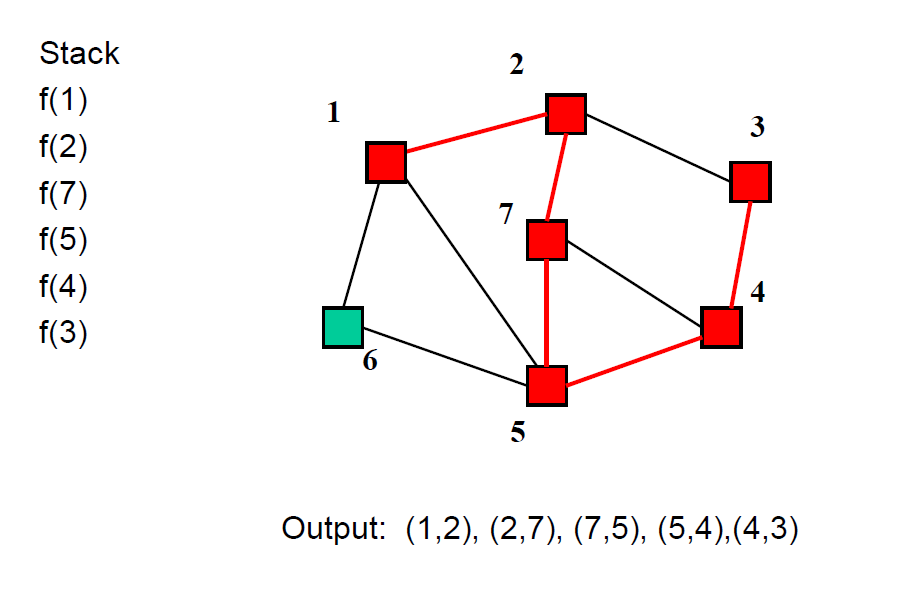

In [14]:
Image(filename='images/week-12/spanningTree6.png', width=500)

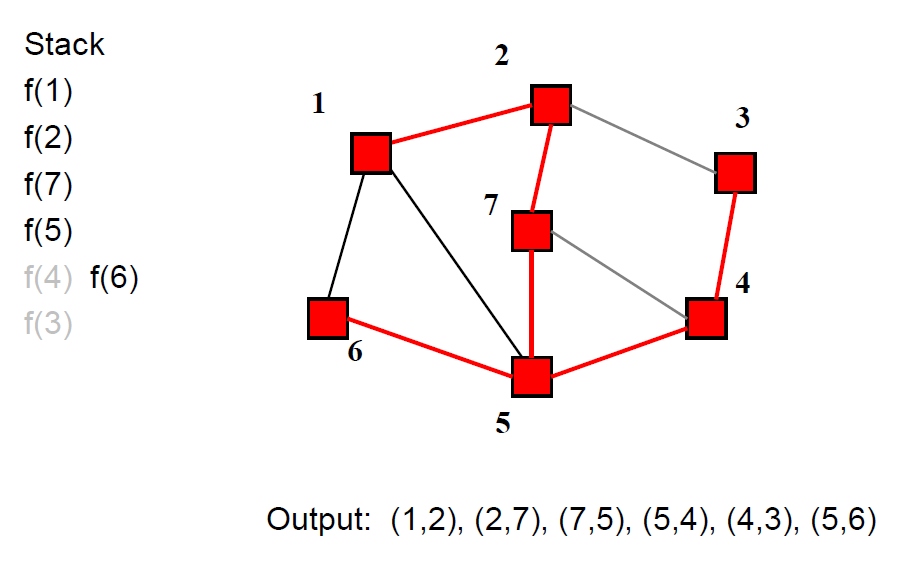

In [15]:
Image(filename='images/week-12/spanningTree7.png', width=500)

### Second Approach
- Iterate through edges; output any edge that does not create a cycle
- Goal is to build an acyclic connected graph
- When we add an edge, it adds a vertex to the tree
    - Else it would have created a cycle
- The graph is connected, so we reach all vertices
- Efficiency:
    - Depends on how quickly you can detect cycles
    
    
    

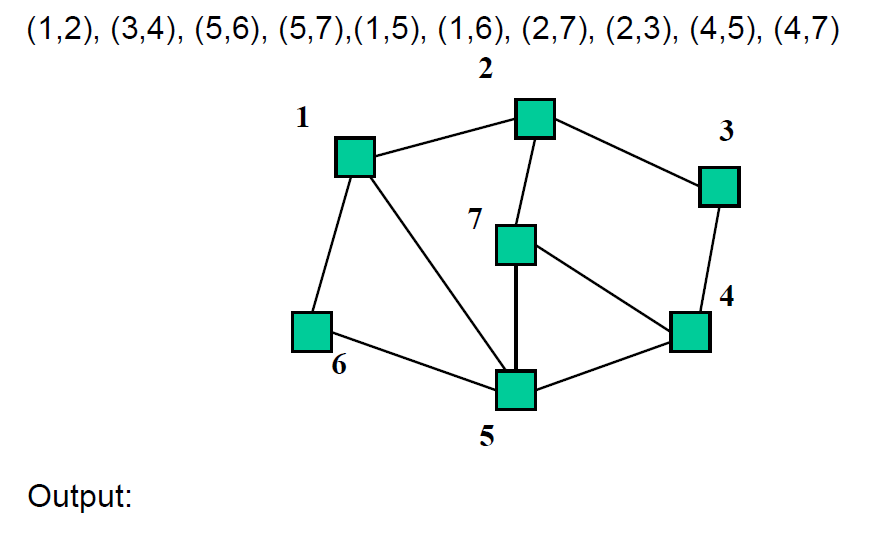

In [16]:
Image(filename='images/week-12/spanningTreeEdges1.png', width=500)

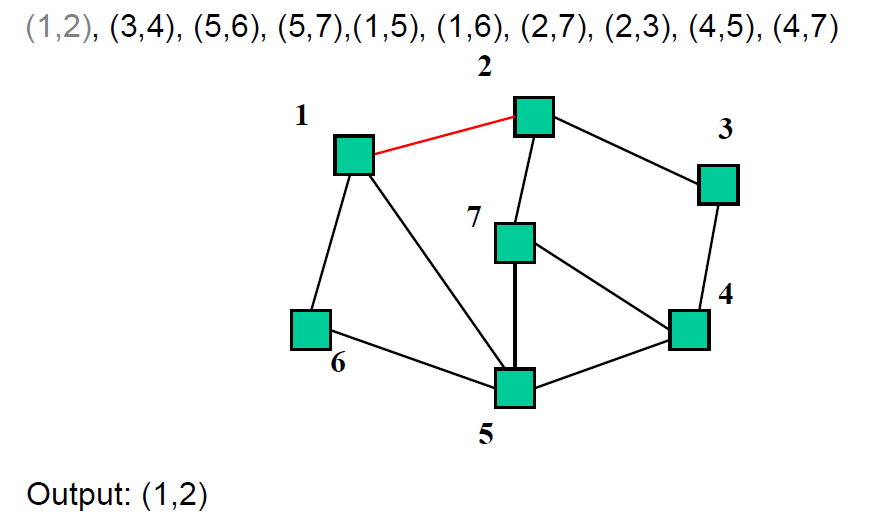

In [17]:
Image(filename='images/week-12/spanningTreeEdges2.png', width=500)

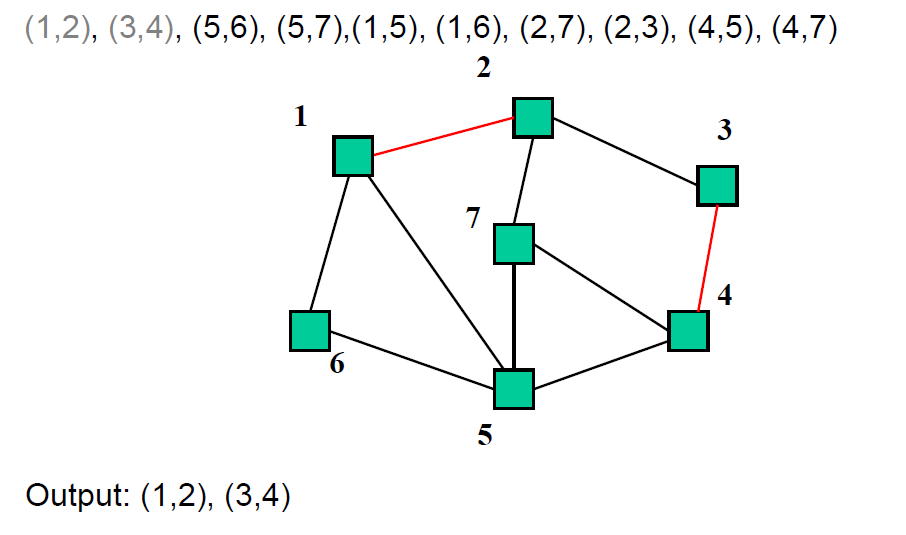

In [18]:
Image(filename='images/week-12/spanningTreeEdges3.png', width=500)

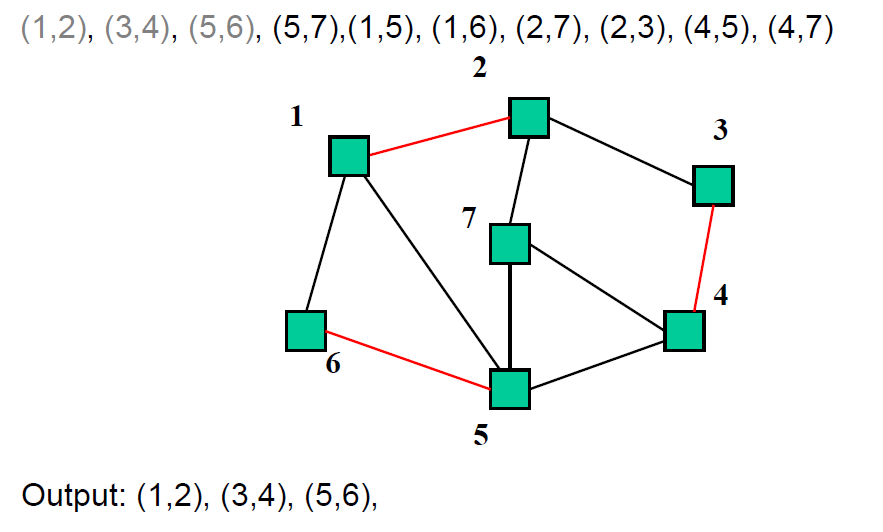

In [19]:
Image(filename='images/week-12/spanningTreeEdges4.png', width=500)

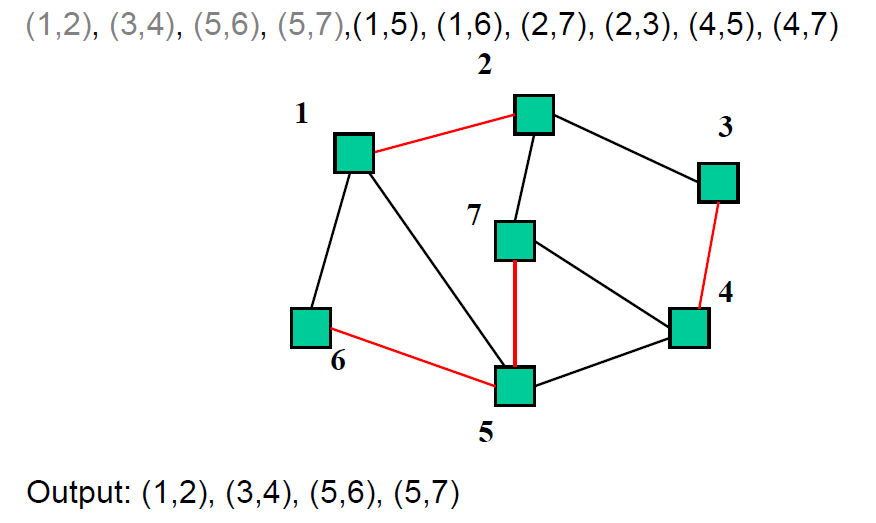

In [20]:
Image(filename='images/week-12/spanningTreeEdges5.png', width=500)

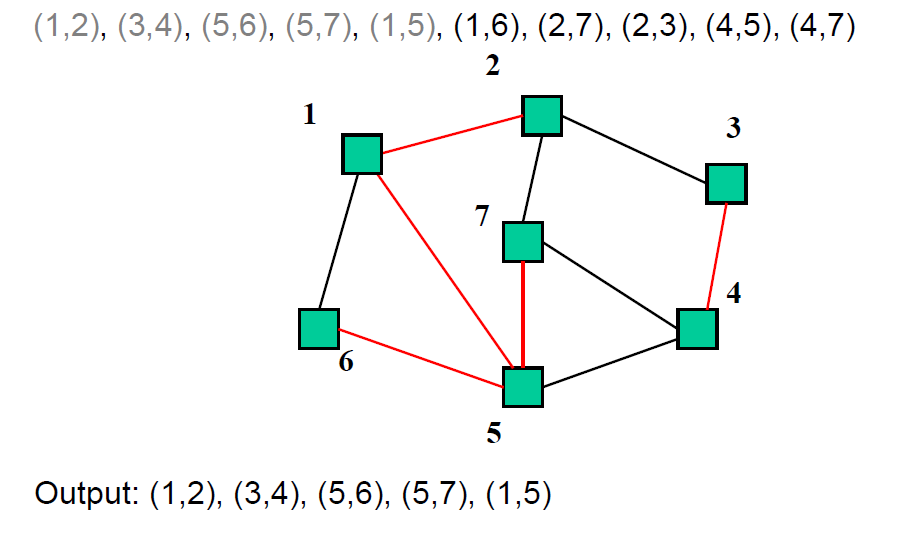

In [21]:
Image(filename='images/week-12/spanningTreeEdges6.png', width=500)

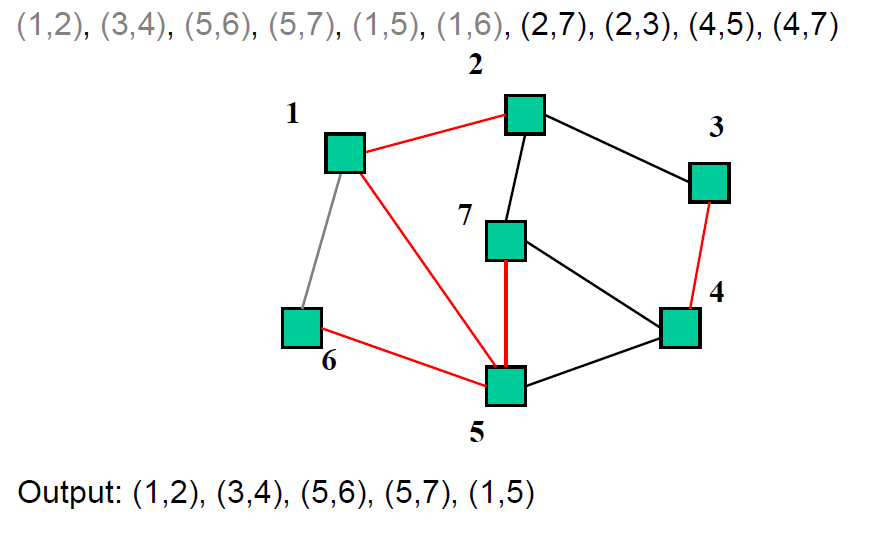

In [22]:
Image(filename='images/week-12/spanningTreeEdges7.png', width=500)

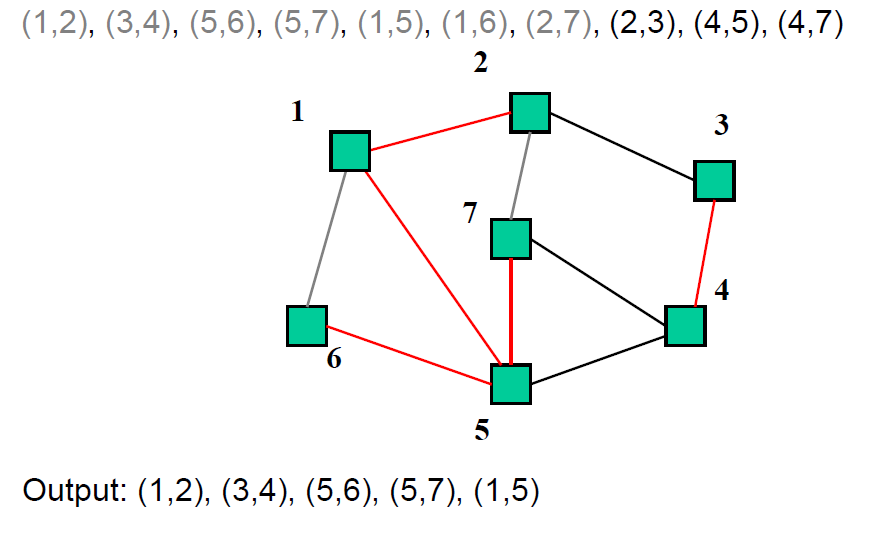

In [23]:
Image(filename='images/week-12/spanningTreeEdges8.png', width=500)

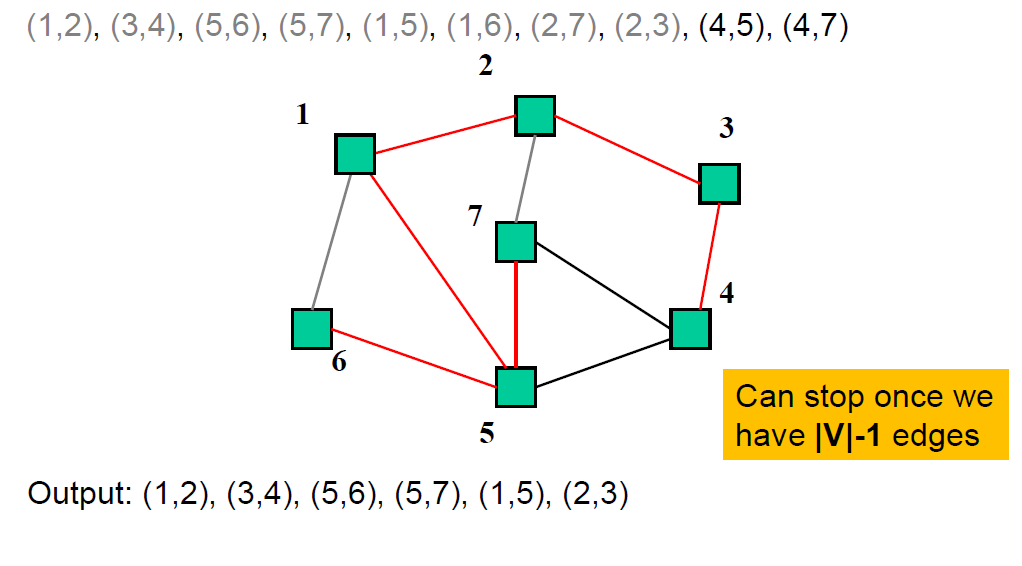

In [24]:
Image(filename='images/week-12/spanningTreeEdges9.png', width=500)

### Cycle Detection
- To decide if an edge could form a cycle is $\mathcal{O}(\vert V\vert)$ because we may need to traverse all edges already in the output
- So overall algorithm would be  $\mathcal{O}(\vert V\vert \vert E\vert)$
- But there is a faster way we know
- Use union-find!
    - Initially, each item is in its own 1-element set
    - Union sets when we add an edge that connects them
    - Stop when we have one set

### Using Disjoint-Sets

- $find(u)$ returns the set where $u$ belongs to. 
- $union(V_{1},V_{2})$ combines the sets $V_{1}$ and $V_{2}$.

- We can use a disjoint-set implementation in our spanning-tree algorithm to detect cycles that is
    - $u$ and $v$ are connected in a graph iff $u$ and $v$ in the same set
- Initially, each node is in its own set
- When processing edge $(u,v)$:
    - If $find(u)$ equals $find(v)$, then do not add the edge
    - Else add the edge and $union(find(u),find(v))$
- Time complexity is $\mathcal{O}(\vert E\vert)$ operations, each cost almost constant time

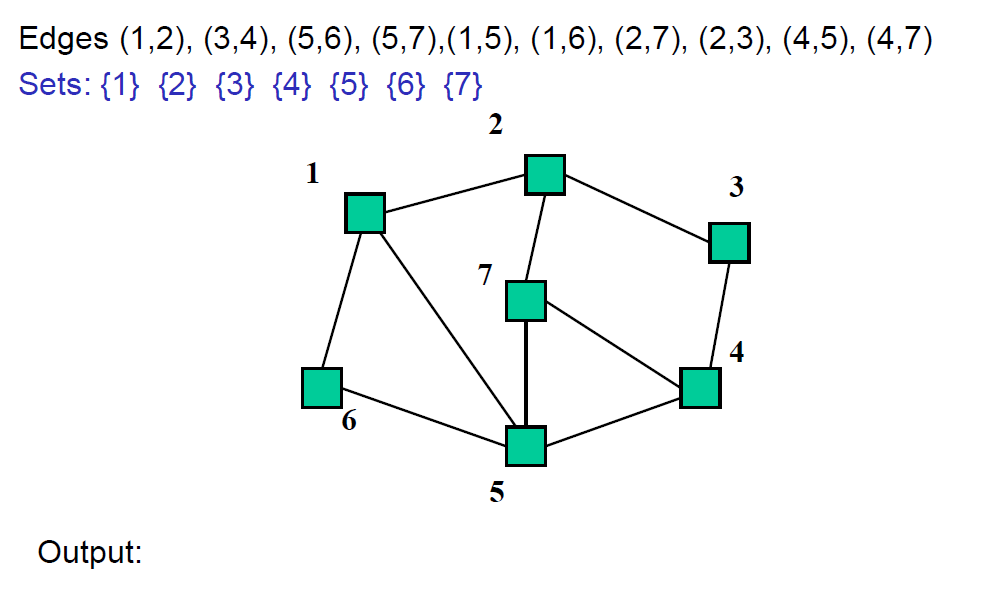

In [25]:
Image(filename='images/week-12/spanningTreeEdgesFindUnion1.png', width=500)

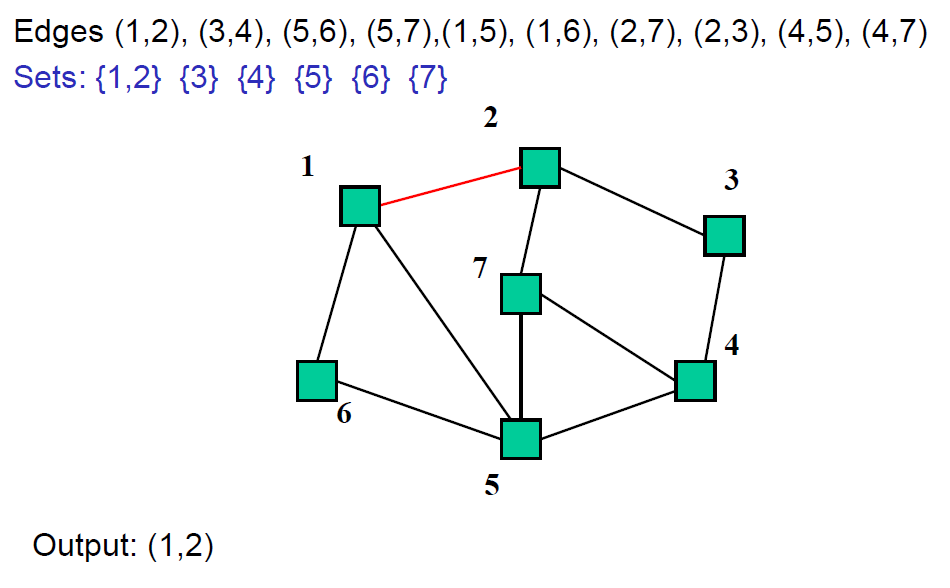

In [26]:
Image(filename='images/week-12/spanningTreeEdgesFindUnion2.png', width=500)

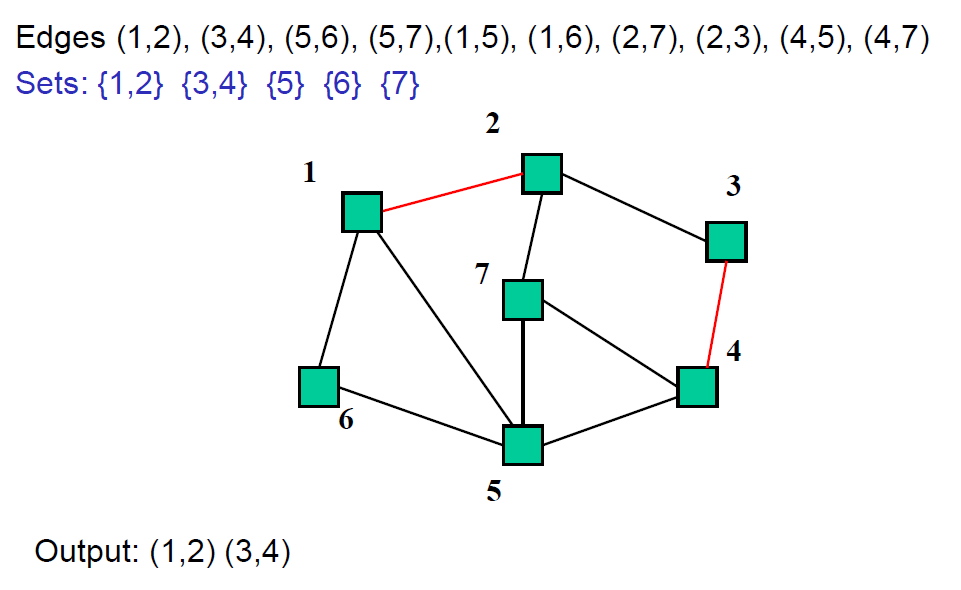

In [27]:
Image(filename='images/week-12/spanningTreeEdgesFindUnion3.png', width=500)

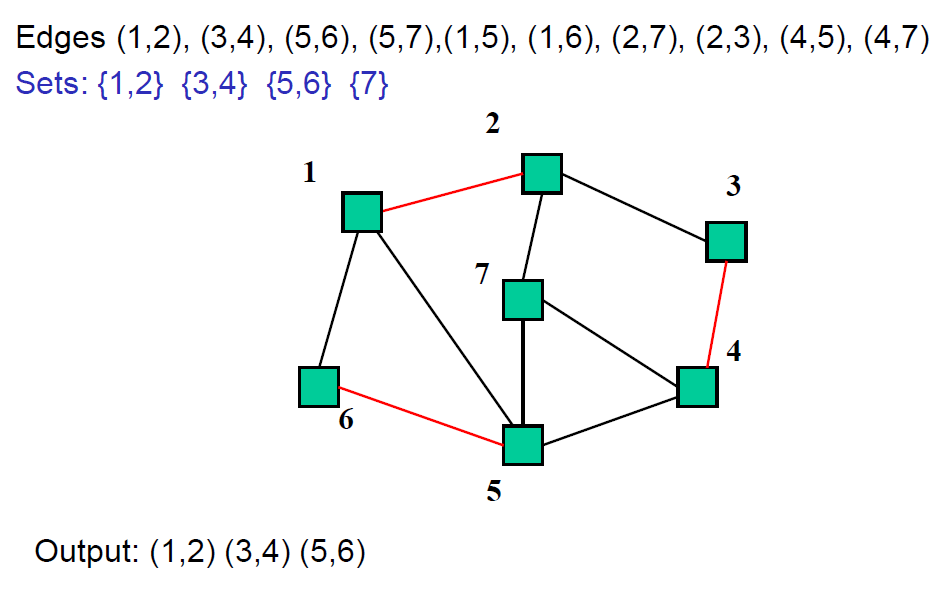

In [28]:
Image(filename='images/week-12/spanningTreeEdgesFindUnion4.png', width=500)

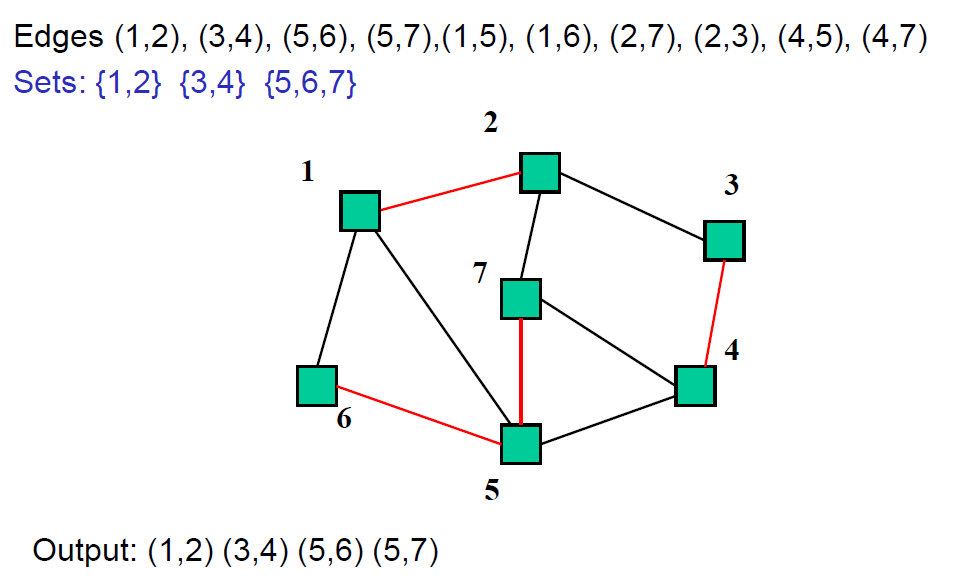

In [29]:
Image(filename='images/week-12/spanningTreeEdgesFindUnion5.png', width=500)

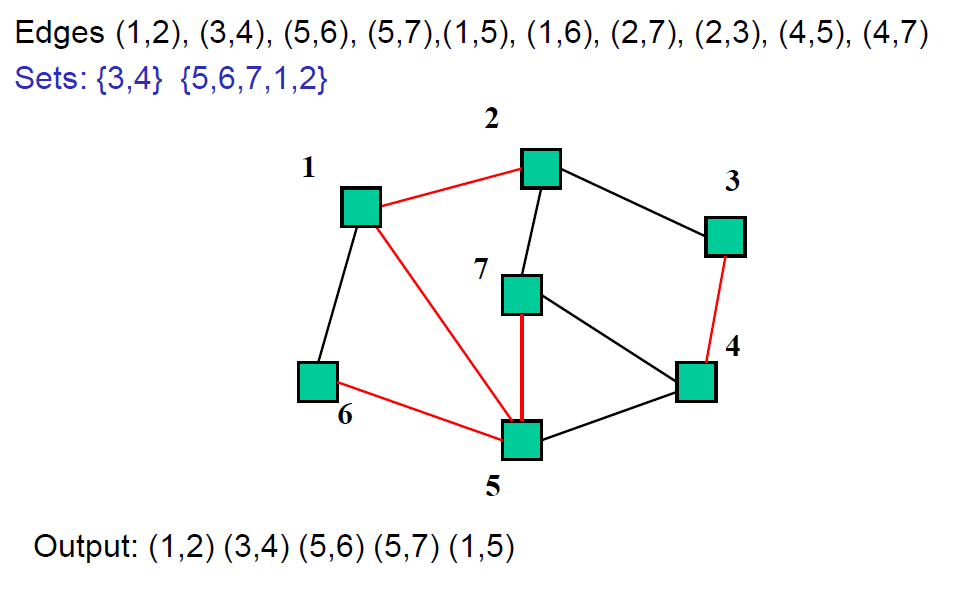

In [30]:
Image(filename='images/week-12/spanningTreeEdgesFindUnion6.png', width=500)

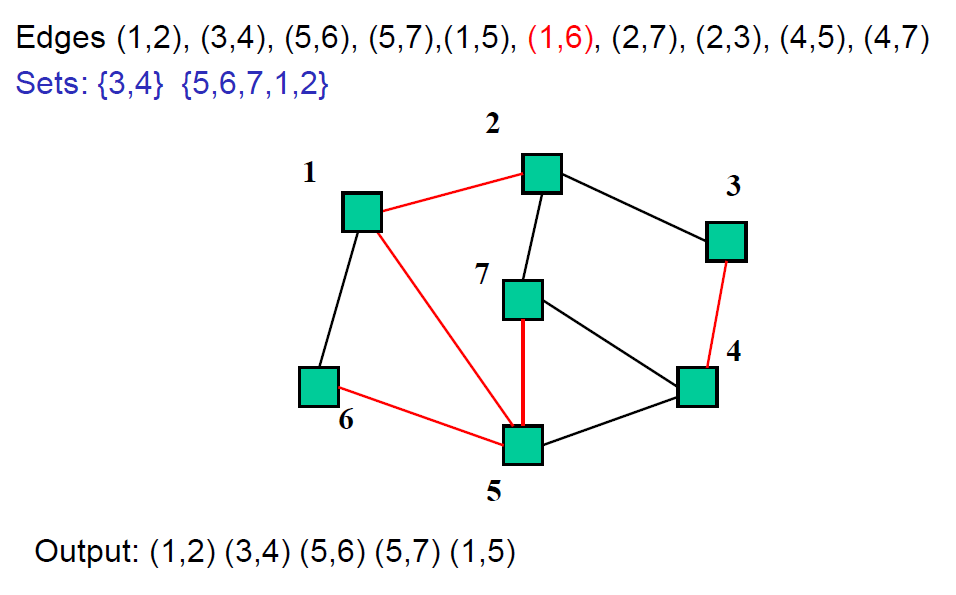

In [31]:
Image(filename='images/week-12/spanningTreeEdgesFindUnion7.png', width=500)

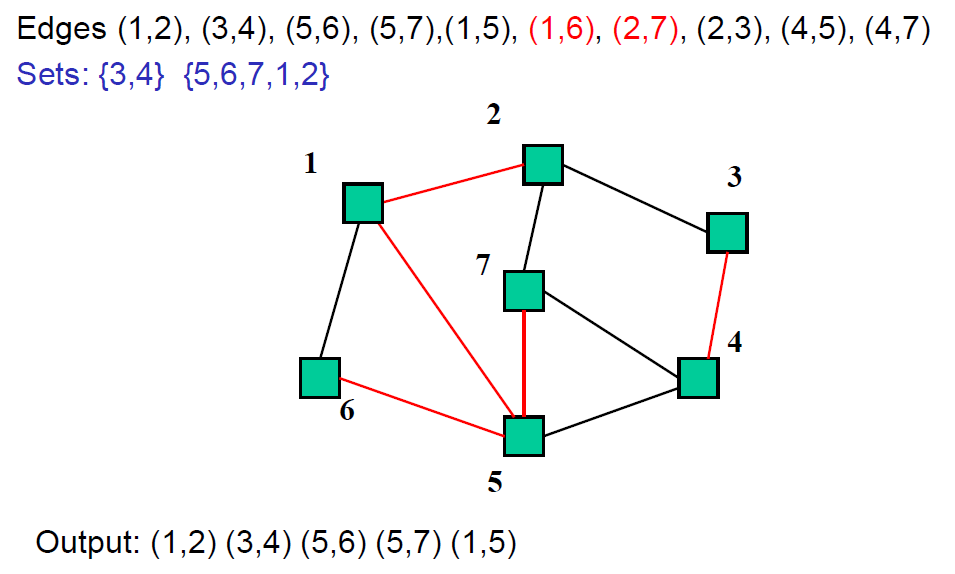

In [32]:
Image(filename='images/week-12/spanningTreeEdgesFindUnion8.png', width=500)

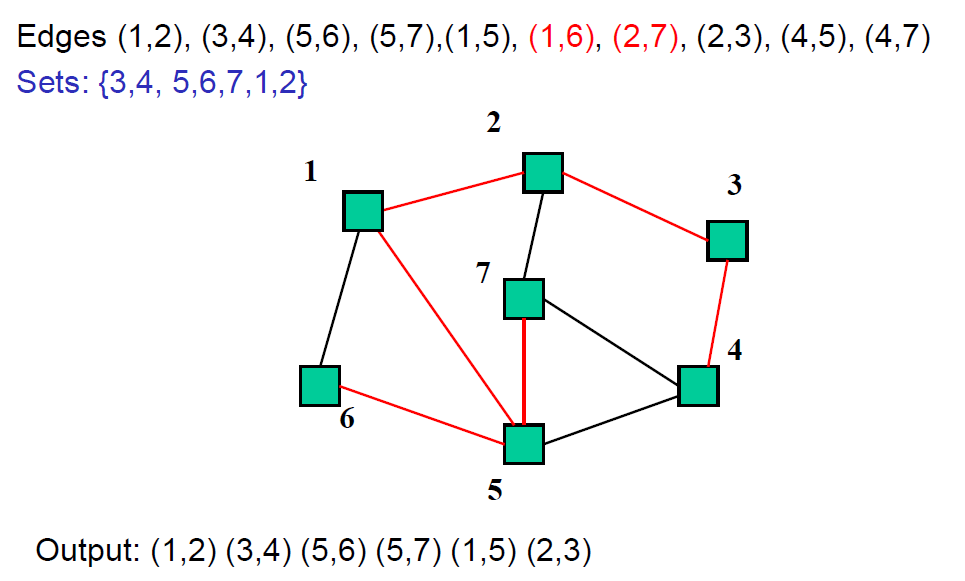

In [33]:
Image(filename='images/week-12/spanningTreeEdgesFindUnion9.png', width=500)

## Minimum Spanning Tree
### Problem: 
**Given:** an undirected, weighted graph $G$

**Find:** A minimum-weight set of edges such that you can get from any vertex of $G$ to any other on only those edges.

### Minimum Spanning Tree
- No specific start node, since the goal is just to minimize the edge weights sum. 
- Often only one possible MST that has the minimum sum.
- All nodes connected 
- Keeps track of cheapest edges that maintain connectivity

## Finding an MST

- Here are two ideas for finding an MST:
Think vertex-by-vertex
- Maintain a tree over a set of vertices
-Have each vertex remember the cheapest edge that could connect it to that set.
-At every step, connect the vertex that can be connected the cheapest.
Think edge-by-edge
- Sort edges by weight. In increasing order:
- add it if it connects new things to each other (don’t add it if it would create a cycle)
Both ideas work!!

## Prim’s Algorithm

- Reminds the shortest-path by Dijkstra’s Algorithm
- **IDEA:** Grow a tree by picking a vertex from the unknown set that has the smallest cost.
    - The **cost** means the cost of the edge that connects that vertex to the known set.
    - Pick the vertex with the smallest cost that connects *known* to **unknown**.

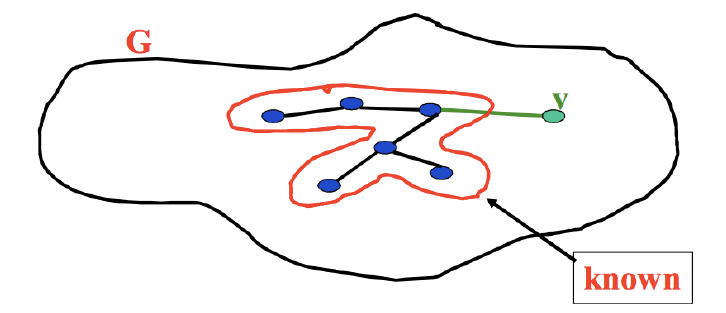

In [34]:
Image(filename='images/week-12/prim1.png', width=500)

A node-based algorithm and builds MST by greedily adding nodes.

### Prim’s vs. Dijkstra’s

- Dijkstra picked the unknown vertex with smallest cost where *cost = distance to the source*.
- Prim’s pick the unknown vertex with smallest cost where *cost = distance from this vertex to the known set*
    - In other words, the cost of the smallest edge connecting this vertex to the known set.
    

### Prim’s Steps

- 1. For each node $v$, set $v.cost = \infty$ and $v.known = false$
- 2. Choose any node $v$
    - a) Mark $v$ as known
    - b) For each edge $(v,u)$ with weight $w$, set $u.cost=w$ and $u.prev=v$
- 3. While there are unknown nodes in the graph
    - a) Select the unknown node $v$ with lowest cost
    - b) Mark $v$ as known and add $(v, v.prev)$ to output
    - c) For each edge $(v,u)$ with weight $w$,
       - if($w < u.cost$) {
            - $u.cost = w$;
            - $u.prev = v$;
       - }

#### Prim’s Example

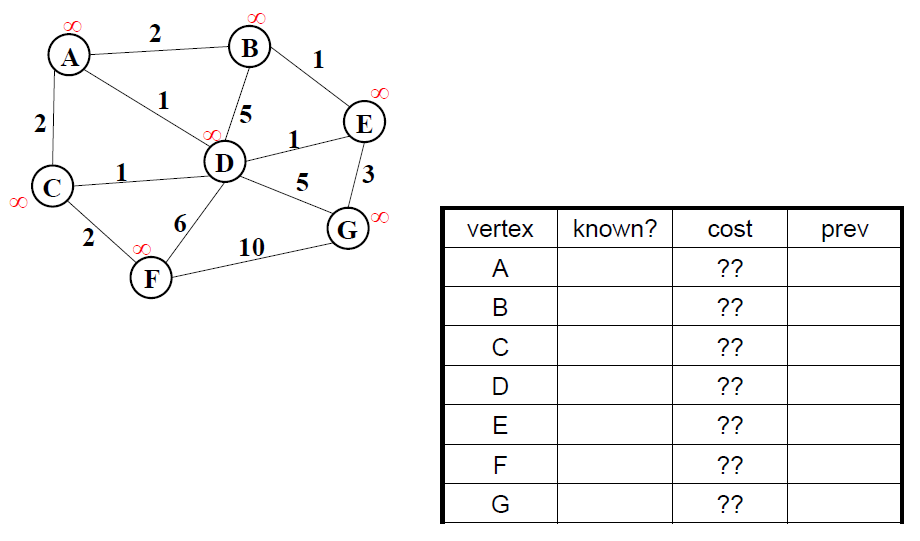

In [35]:
Image(filename='images/week-12/primExample1.png', width=500)

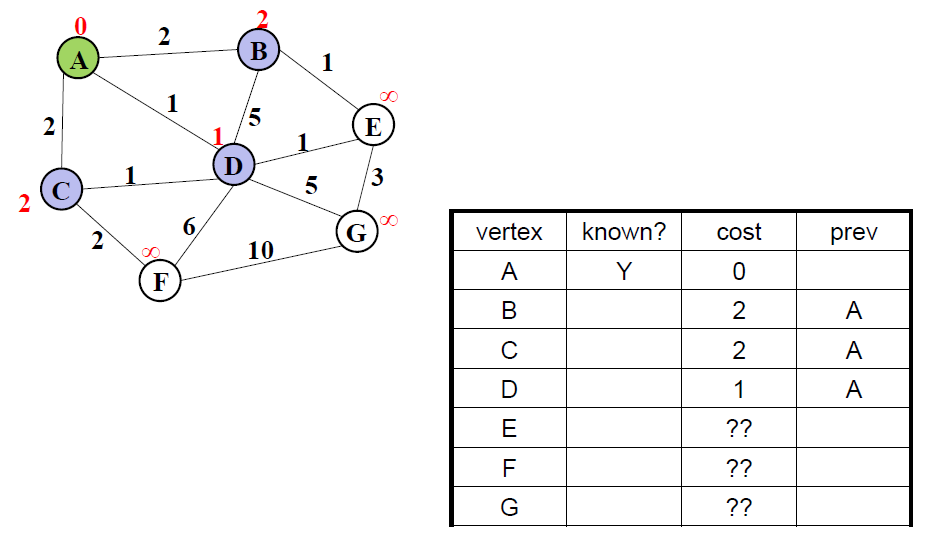

In [36]:
Image(filename='images/week-12/primExample2.png', width=500)

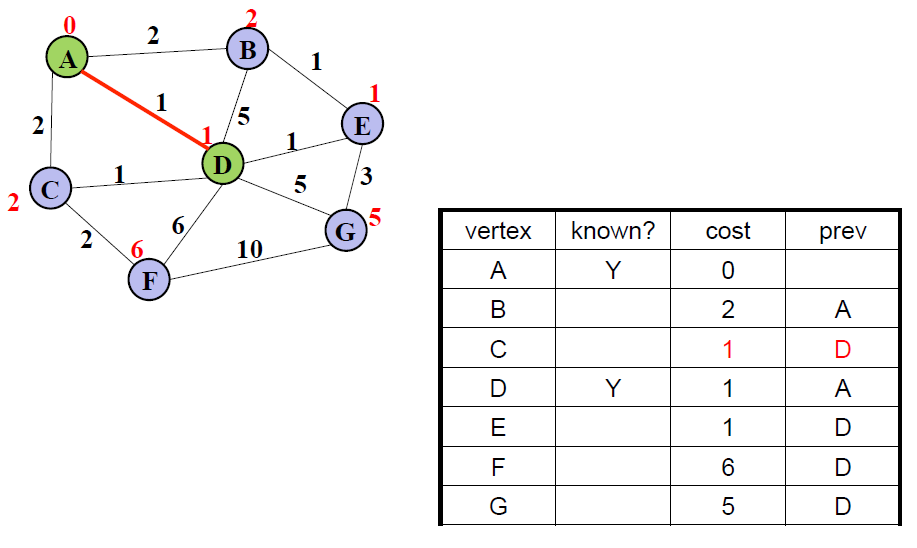

In [37]:
Image(filename='images/week-12/primExample3.png', width=500)

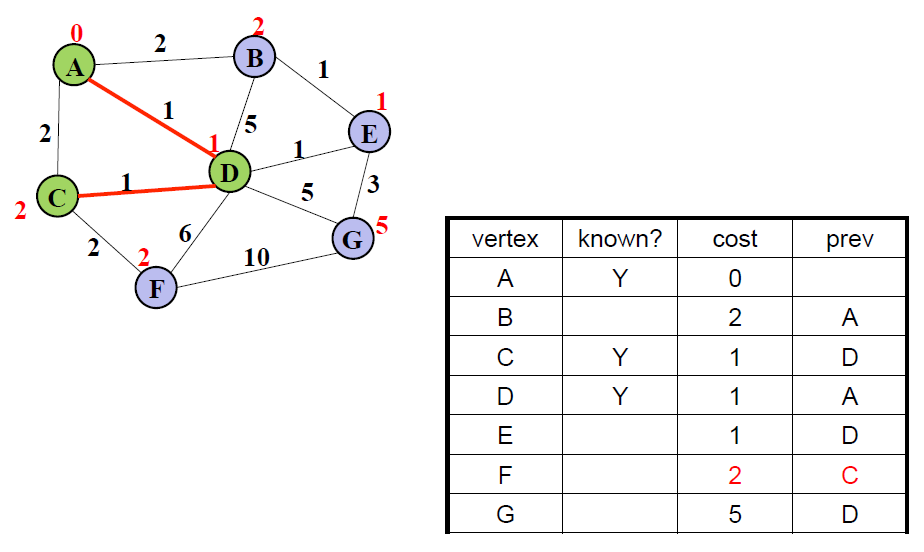

In [38]:
Image(filename='images/week-12/primExample4.png', width=500)

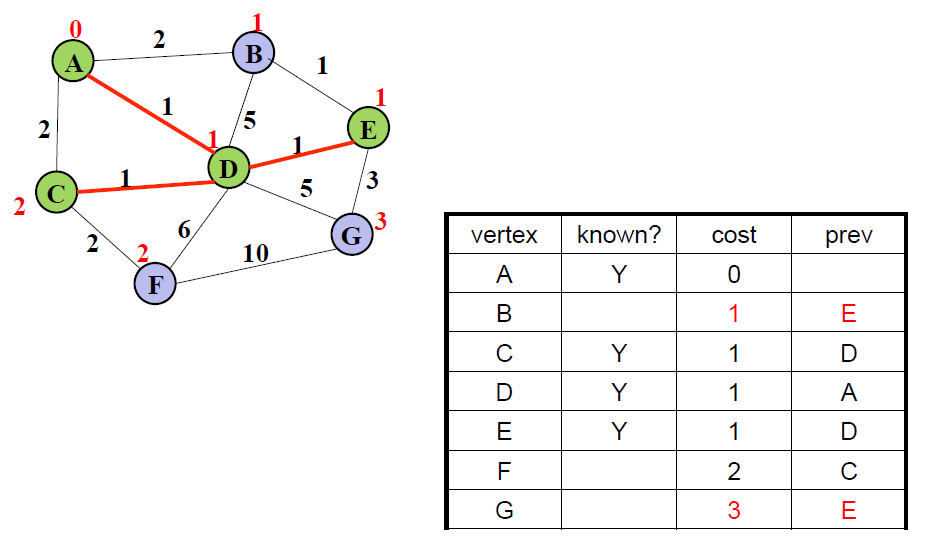

In [39]:
Image(filename='images/week-12/primExample5.png', width=500)

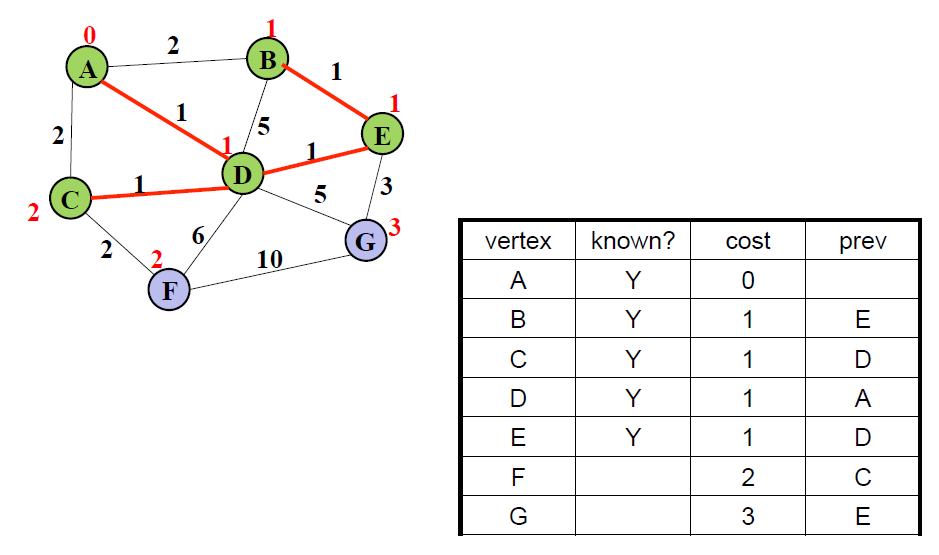

In [40]:
Image(filename='images/week-12/primExample6.png', width=500)

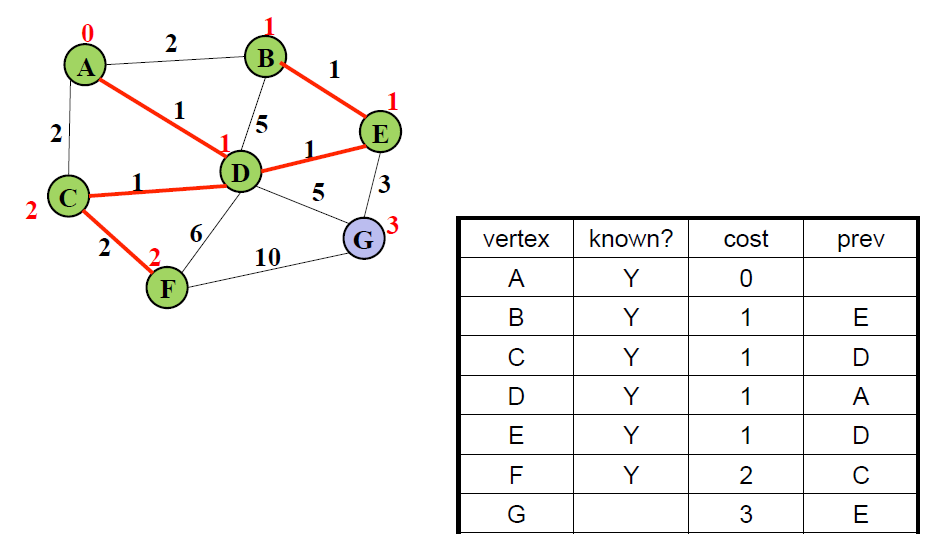

In [41]:
Image(filename='images/week-12/primExample7.png', width=500)

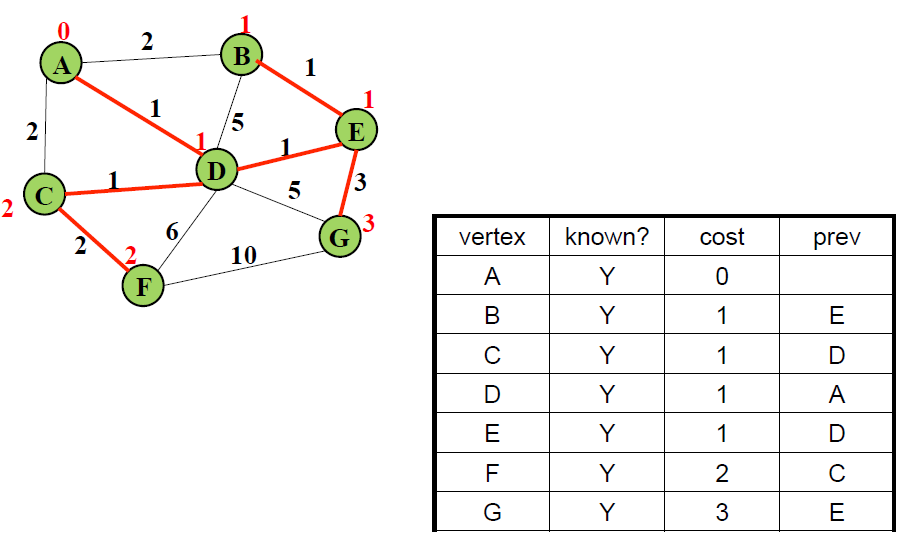

In [42]:
Image(filename='images/week-12/primExample8.png', width=500)

#### Another Example

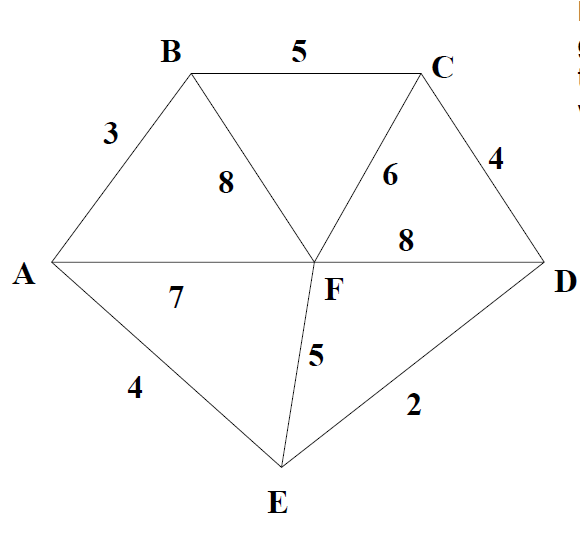

In [43]:
Image(filename='images/week-12/primExample21.png', width=500)

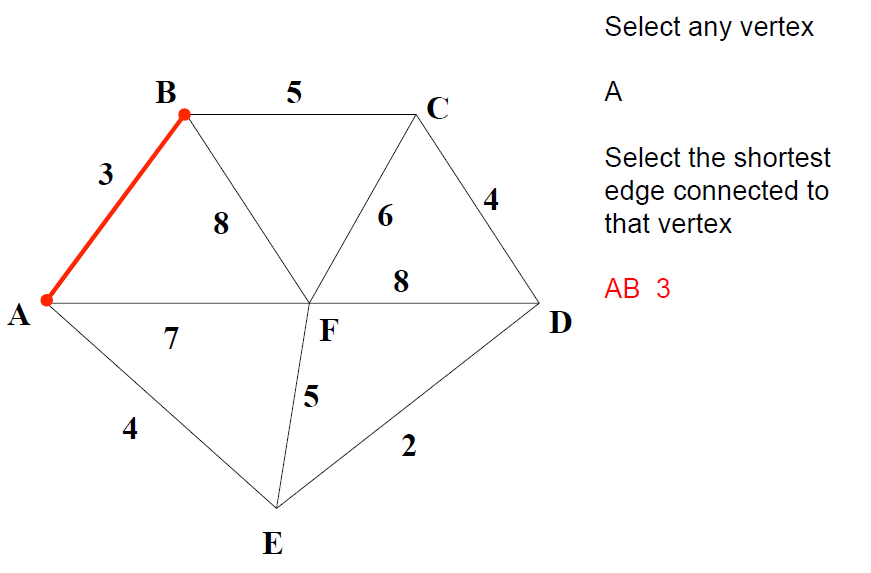

In [44]:
Image(filename='images/week-12/primExample22.png', width=300)

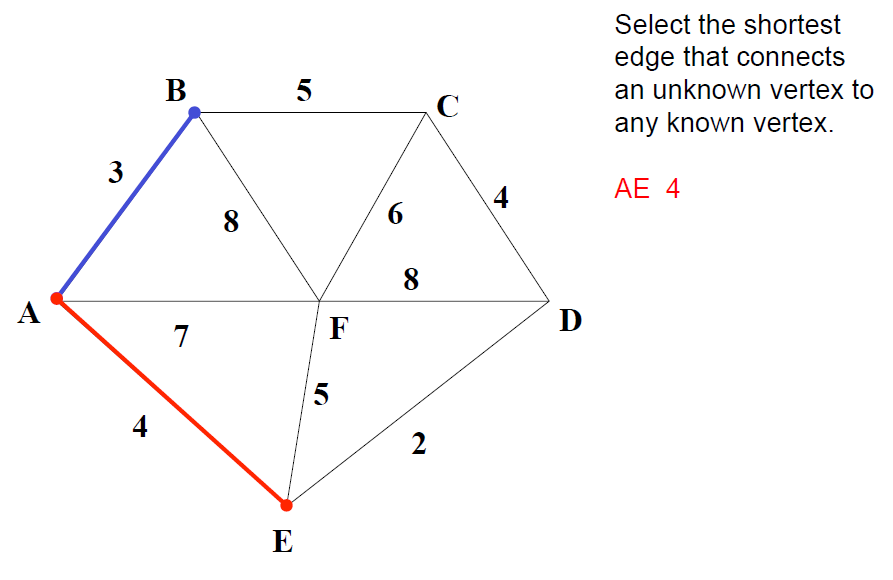

In [45]:
Image(filename='images/week-12/primExample23.png', width=300)

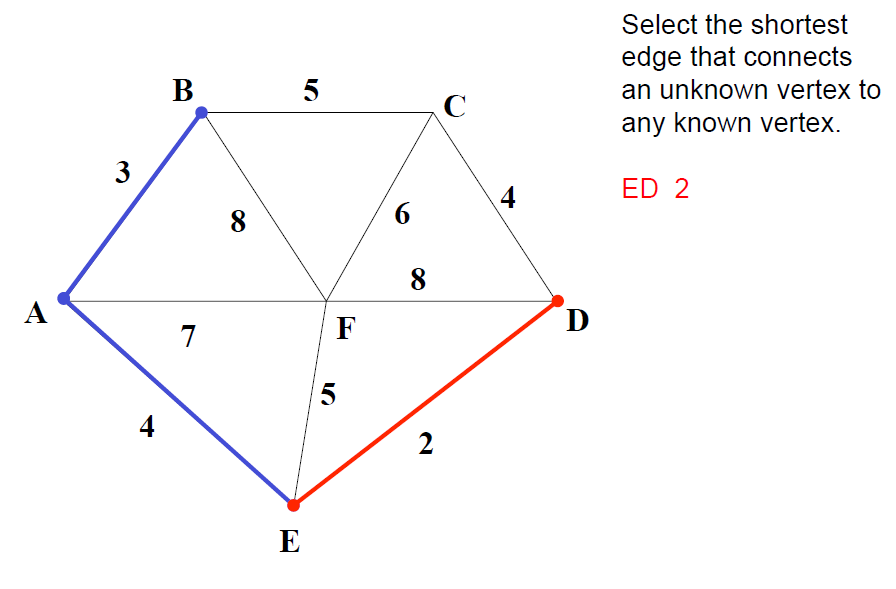

In [46]:
Image(filename='images/week-12/primExample24.png', width=300)

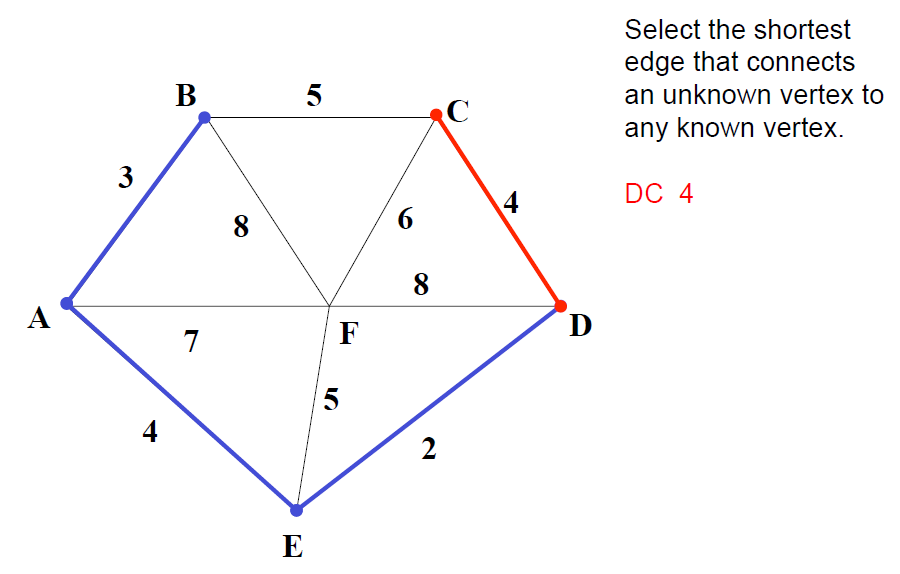

In [47]:
Image(filename='images/week-12/primExample25.png', width=300)

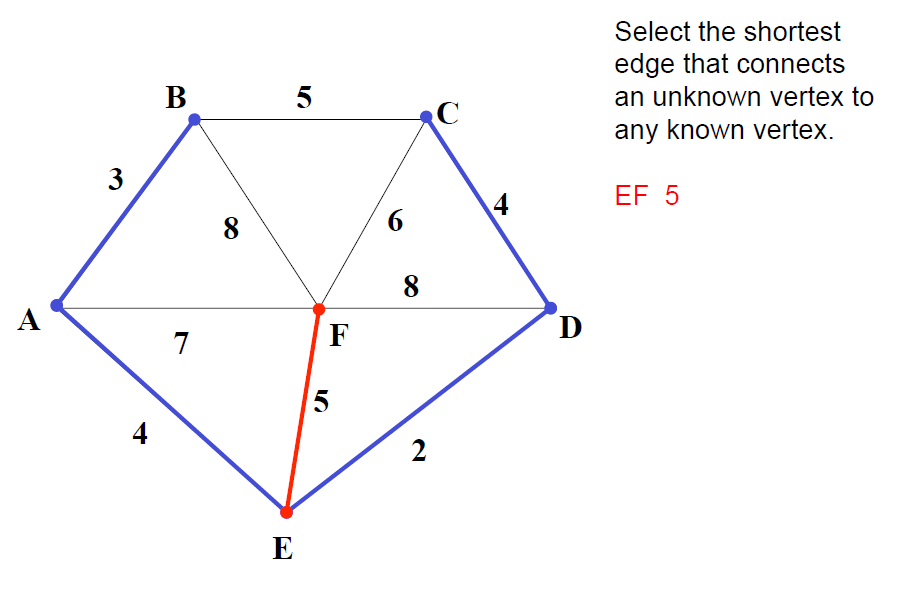

In [48]:
Image(filename='images/week-12/primExample26.png', width=300)

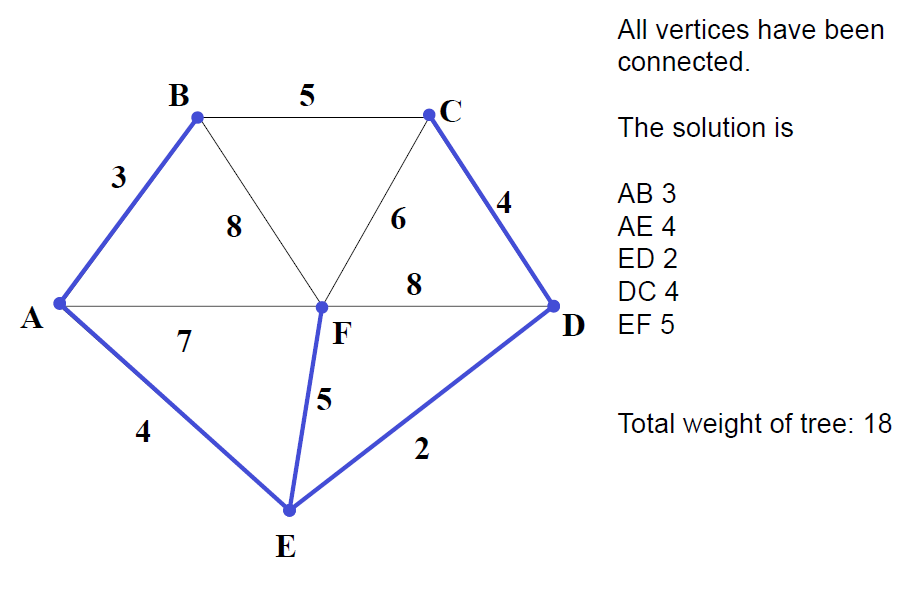

In [49]:
Image(filename='images/week-12/primExample27.png', width=300)

### Kruskal’s Algorithm

- Another, but different, greedy MST algorithm.
- Uses the Union-Find data structure.

- **IDEA:** Grow a *forest* out of edges that do not create a cycle. Pick an edge with the smallest weight.

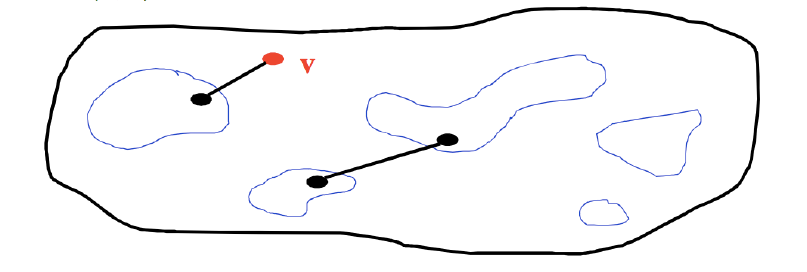

In [50]:
Image(filename='images/week-12/kruskal.png', width=500)

An edge-based algorithm and builds MST by greedily adding edges.

### Kruskal’s Steps

- 1. Sort edges by weight
- 2. Each node in its own set
- 3. While output $size < |V|-1$
    - Consider next smallest edge $(u,v)$
    - if $find(u)$ and $find(v)$ indicate $u$ and $v$ are in different sets
        - output $(u,v)$
        - $union(find(u),find(v))$

#### Kruskal’s Example

**Note:** At each step, the union/find sets are the trees in the forest

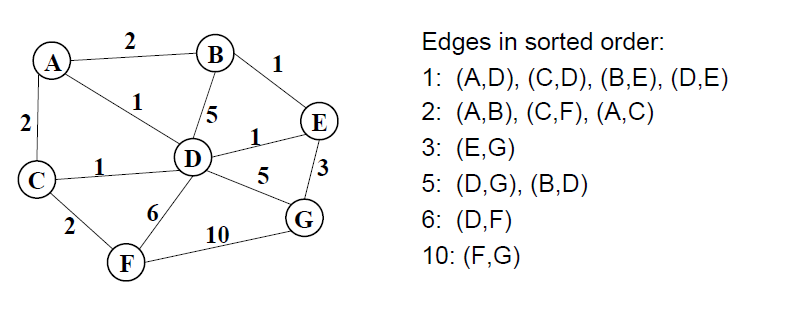

In [51]:
Image(filename='images/week-12/kruskalExample1.png', width=500)

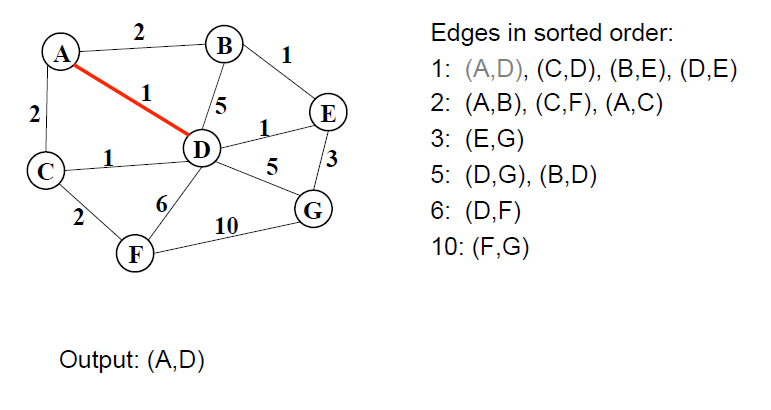

In [52]:
Image(filename='images/week-12/kruskalExample2.png', width=500)

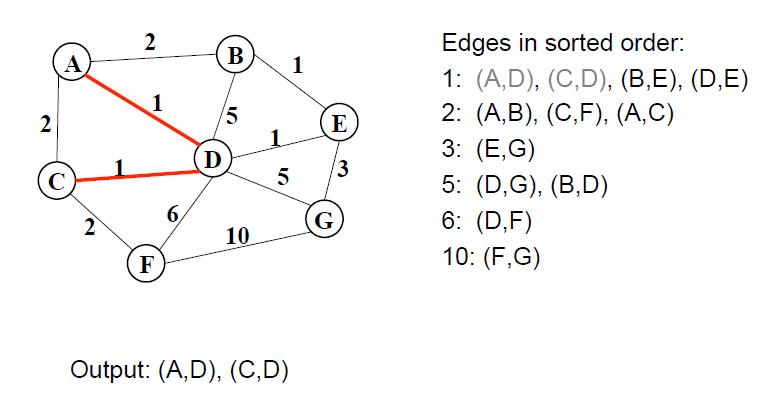

In [53]:
Image(filename='images/week-12/kruskalExample3.png', width=500)

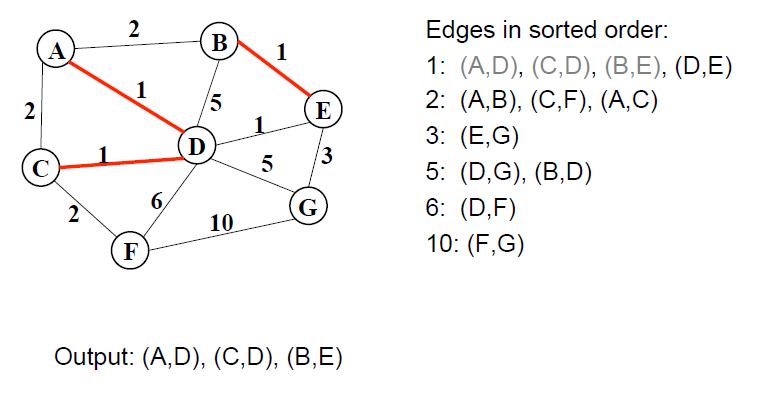

In [54]:
Image(filename='images/week-12/kruskalExample4.png', width=500)

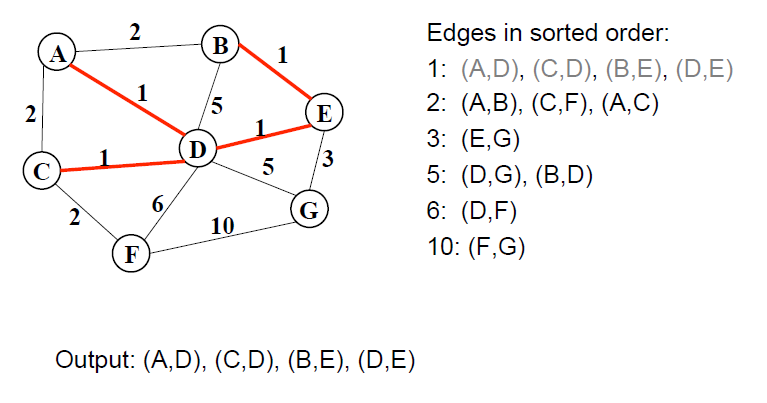

In [55]:
Image(filename='images/week-12/kruskalExample5.png', width=500)

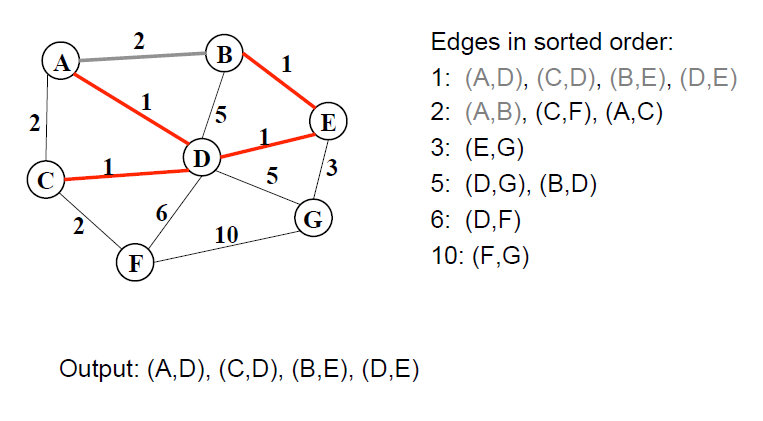

In [56]:
Image(filename='images/week-12/kruskalExample6.png', width=500)

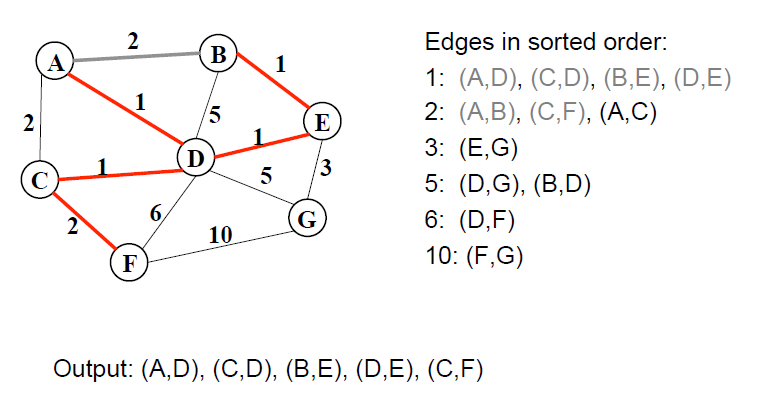

In [57]:
Image(filename='images/week-12/kruskalExample7.png', width=500)

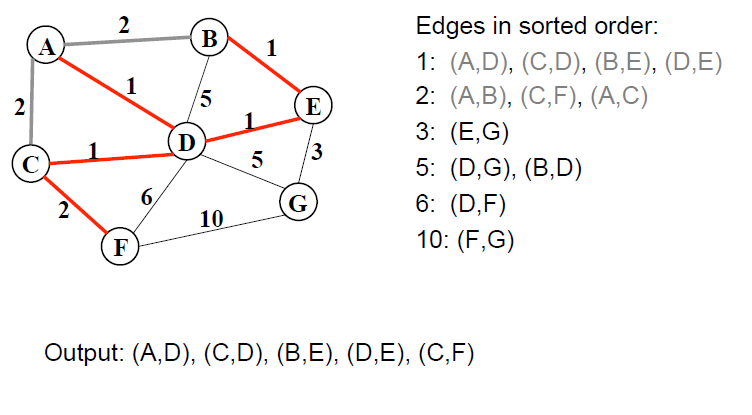

In [58]:
Image(filename='images/week-12/kruskalExample8.png', width=500)

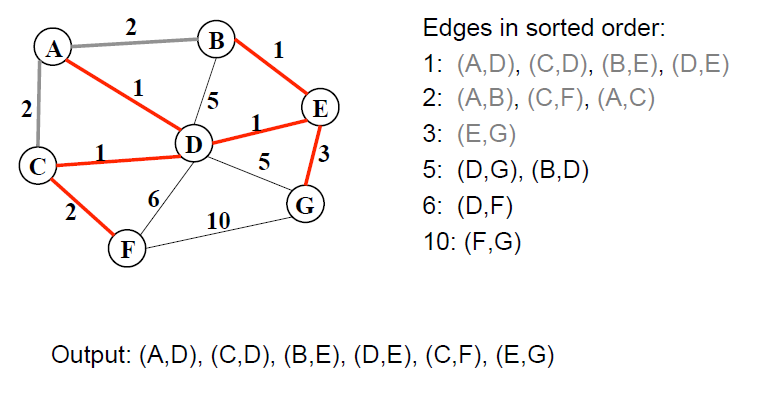

In [59]:
Image(filename='images/week-12/kruskalExample9.png', width=500)

#### Kruskal’s Algorithm Analysis

- **Idea:** Grow a forest out of edges that do not grow a cycle, just like for the spanning tree problem.
    - But now consider the edges in order by weight
- Time complexity
    - Sort edges: $\mathcal{O}(|E|\log{|E|})$
    - Iterate through edges using union-find for cycle detection almost  $\mathcal{O}(|E|)$

#### Another Example

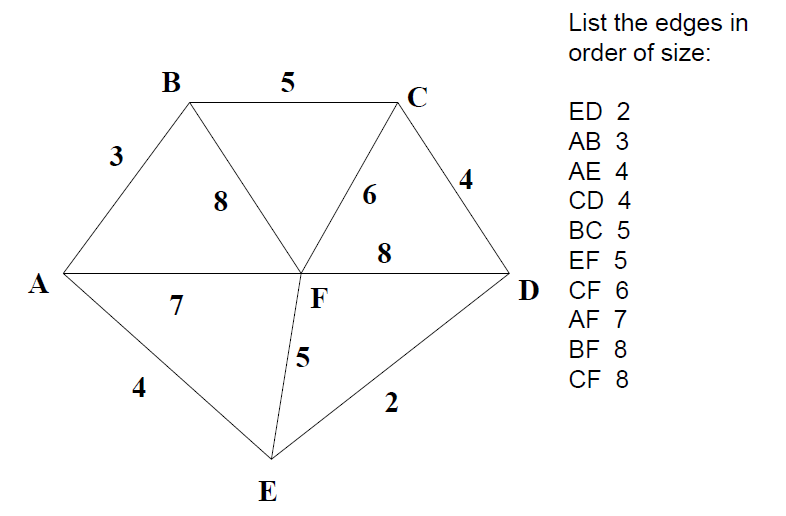

In [60]:
Image(filename='images/week-12/kruskalExample21.png', width=300)

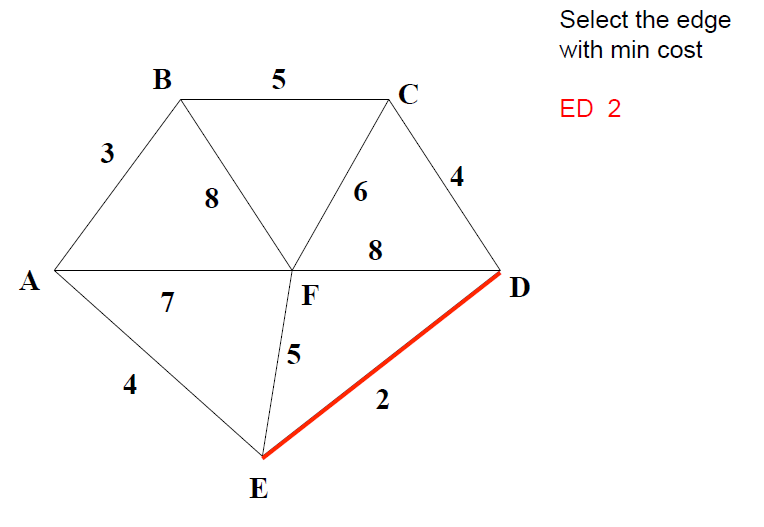

In [61]:
Image(filename='images/week-12/kruskalExample22.png', width=300)

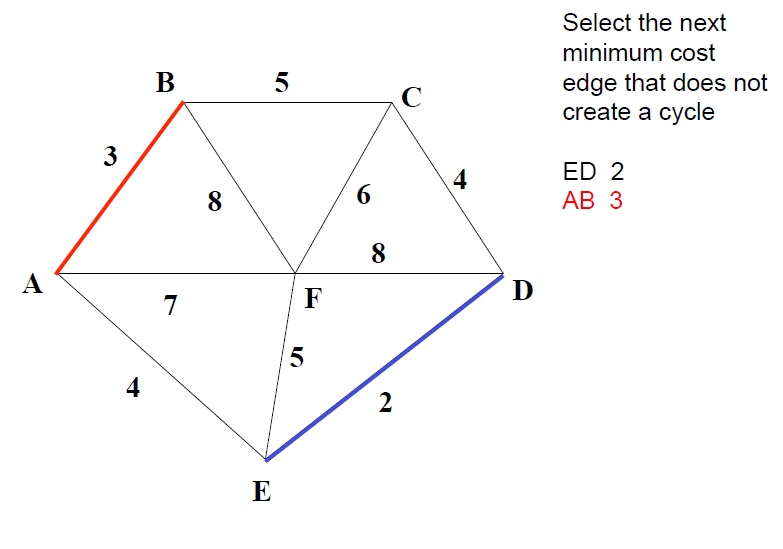

In [62]:
Image(filename='images/week-12/kruskalExample23.png', width=300)

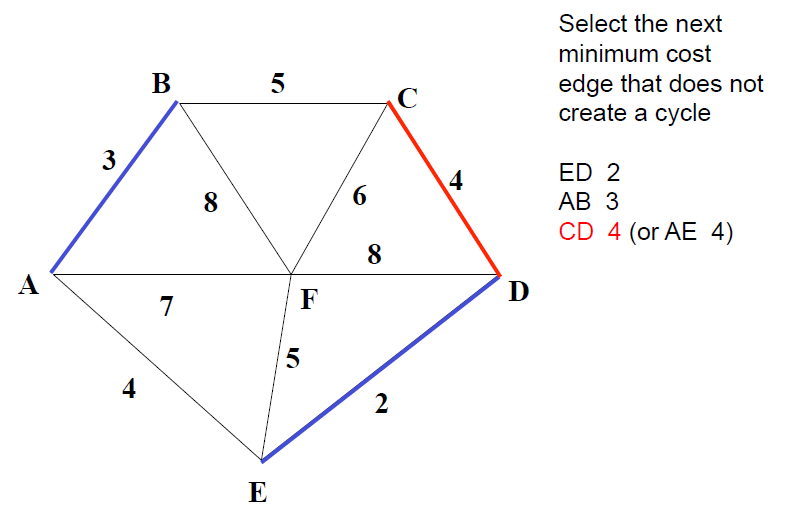

In [63]:
Image(filename='images/week-12/kruskalExample24.png', width=300)

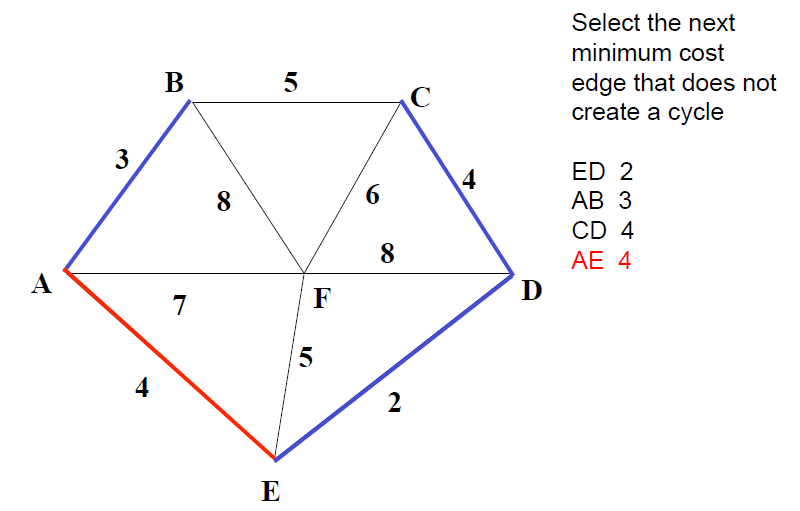

In [64]:
Image(filename='images/week-12/kruskalExample25.png', width=300)

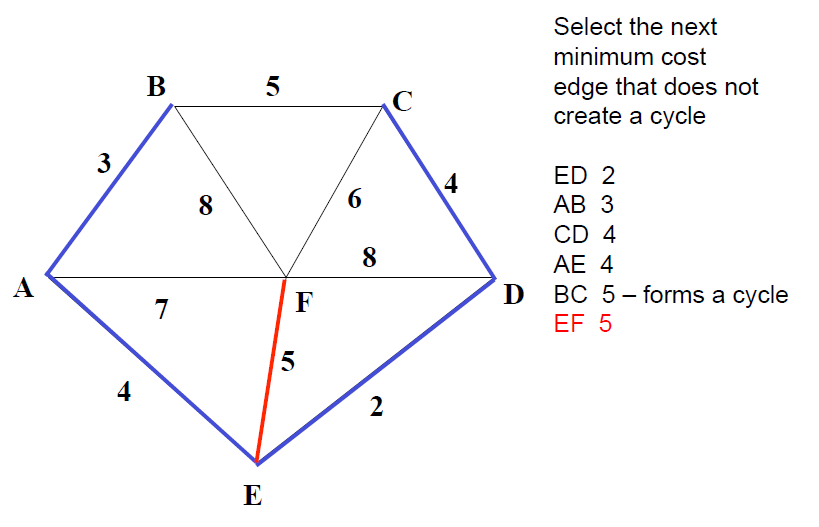

In [65]:
Image(filename='images/week-12/kruskalExample26.png', width=300)

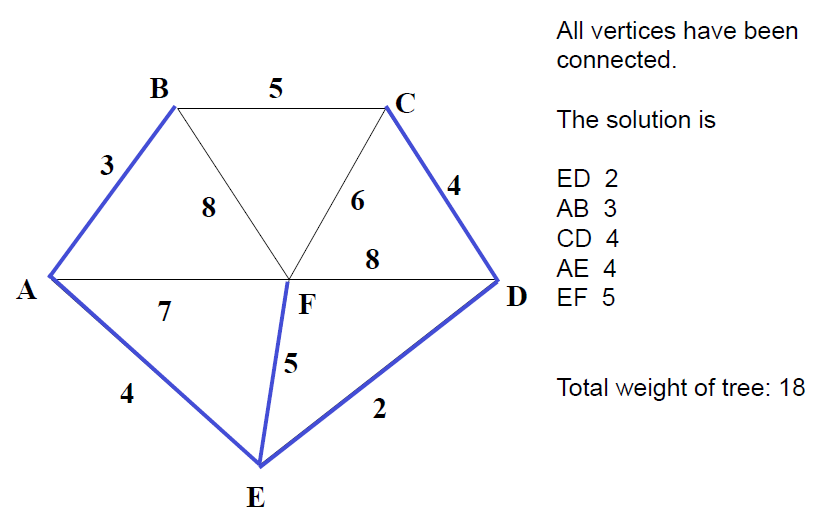

In [66]:
Image(filename='images/week-12/kruskalExample27.png', width=300)